# <center>Data Mining Project</center>

<center>
Master in Data Science and Advanced Analytics <br>
NOVA Information Management School
</center>

** **
## <center>*ABCDEats Inc*</center>

<center>
Group 19 <br>
Jan-Louis Schneider, 20240506  <br>
Marta Boavida, 20240519  <br>
Matilde Miguel, 20240549  <br>
Sofia Gomes, 20240848  <br>
</center>

** **

## <span style="color:salmon"> Notebook </span> 

In this notebook, we create some visualizations that we think are relevant to understanding the project and some relationships between them

## <span style="color:salmon"> Table of Contents </span>

<a class="anchor" id="top"></a>

1. [Import Libraries](#one-bullet) <br>

2. [Import Datasets](#two-bullet) <br>

3. [Visualizatios](#three-bullet) <br>

4. [Export Datasets](#four-bullet) <br> 


<a class="anchor" id="one-bullet"></a>
## <span style="color:salmon"> 1. Import Libraries </span> 

In [1]:
import pandas as pd 
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import scipy.stats as stats
import warnings

from utils import *

from math import ceil
from sklearn.impute import KNNImputer

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

<a class="anchor" id="two-bullet"> 

## <span style="color:salmon"> 2. Import Dataset </span> 

<a href="#top">Top &#129033;</a>

In [2]:
df = pd.read_csv("../dataset/df_feature_engineering.csv")


<a class="anchor" id="three-bullet"> 

## <span style="color:salmon">3. Visualizations </span> 

<a href="#top">Top &#129033;</a>

In order to explore the relationships among the features, we looked for trends and patterns

#### <span style="color:salmon"> 3.1 Correlation of all numerical features  </span> 
We filter all correlations that are greather than 0.7 and smaller than 1.0 to avoid correlations with itself:

In [3]:
# correlations of all numerical features
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr(method='pearson')

# transforming them into a list
corr_pairs = corr_matrix.unstack()   

# filtering for correlations only > 0.7 and < 1.0 and dropping duplicates
corr_pairs[(corr_pairs > 0.7) & (corr_pairs < 1.0)].drop_duplicates() 

customer_region  avg_per_product     0.737174
vendor_count     product_count       0.861285
                 is_chain            0.768041
                 culinary_variety    0.875863
product_count    is_chain            0.803354
                 total_expenses      0.792868
                 culinary_variety    0.749793
is_chain         culinary_variety    0.723755
avg_per_product  avg_per_order       0.828027
avg_per_order    avg_order_size      0.710928
dtype: float64

**Conclusions:** 
+ vendor_count and product_count have high correlation, probably because more orders lead to potentially more different vendors
+ vendor_count and culinary_variety also have high correlation, logically because ordering from more vendors usually leads to ordering from different cuisines as well
+ product_count has high correlation with total_expenses, also logically because more products ordered leads to more expenses
+ correlations with is_chain probably random since the types of values (mostly numbers between 1 and 3) are similar between is_chain and vendor/product_count
+ avg_per_product correlate with avg_per_order, which is logically
+ avg_per_order correlates slightly with avg_order_size, also logically because more expensive orders usually have more products

#### <span style="color:salmon"> 3.2 Visualization of total Orders placed per Hour </span> 
The number total of orders in each hour is represented by:

.2 Visualization of total Orders placed per Hour </span> 
The number total of orders in each hour is represented by:

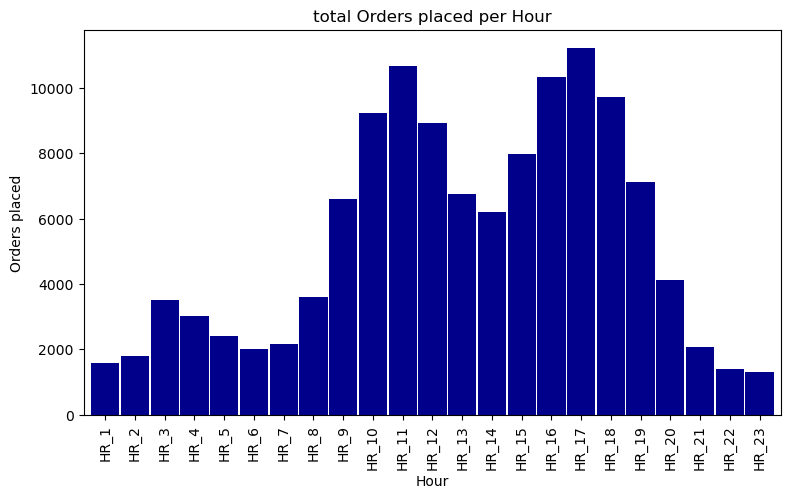

In [4]:
# creating a list with all names of the HR_x columns
HRs = [f'HR_{i}' for i in range(1, 24)] 

# plotting all the hours and its total orders placed
df[HRs].sum().plot(kind='bar', figsize=(9, 5), width=0.95, color='darkblue') 

plt.xlabel('Hour')
plt.ylabel('Orders placed')
plt.title('total Orders placed per Hour')
plt.show()

**Conclusions:** 
+ We can see the most orders placed between 10h to 12h and 16h to 18h

#### <span style="color:salmon"> 3.3 Visualization of total Orders placed per week day </span> 
The number total of orders in each day is represented by:

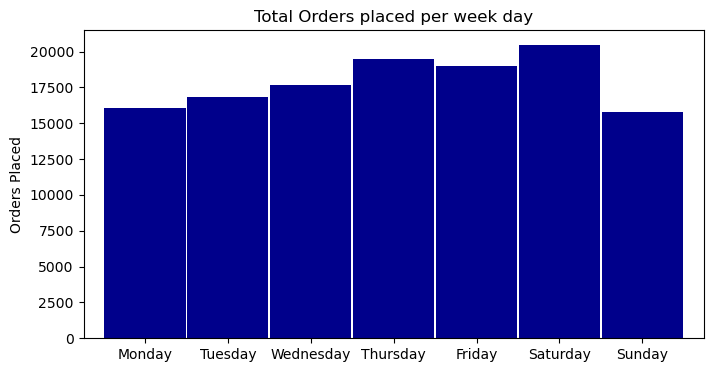

In [5]:
# plotting the data
dows = ['DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'DOW_0'] # this order so it is from Monday to Sunday, not Sunday to Saturday]

df[dows].sum().plot(kind='bar', figsize=(8, 4), width=0.98, color='darkblue')   

plt.title('Total Orders placed per week day')
plt.grid(axis='y', linestyle='-', linewidth=0, color='gray')
plt.xticks(ticks= [0,1,2,3,4,5,6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)
plt.ylabel('Orders Placed')
plt.grid(axis='y')
plt.show()

**Conclusions:** 
+ We can see the most orders placed on Thursday and Saturday, least on Sunday

#### <span style="color:salmon"> 3.4 Percentage of each payment_method for each age_group </span>
First we create a column to put the custumer_age in smaller groups:

In [6]:
df['customer_age'].sort_values().unique()
# classficating age in groups, 15-17, 18-22 etc.
binsAge = [15, 18, 23, 29, 36, 50, 81]      
labelsAge = ['15-17', '18-22', '23-28', '29-35', '36-49', '50+']
df['customer_age_group'] = pd.cut(df['customer_age'], bins=binsAge, labels=labelsAge, right=False)
warnings.filterwarnings('ignore')

Then, we created three plots: 
+ Percentage of use of DIGI by age
+ Percentage of use of CASH by age
+ Percentage of use of CARD by age

Text(0.5, 1.0, 'Percentage of use of CARD by age')

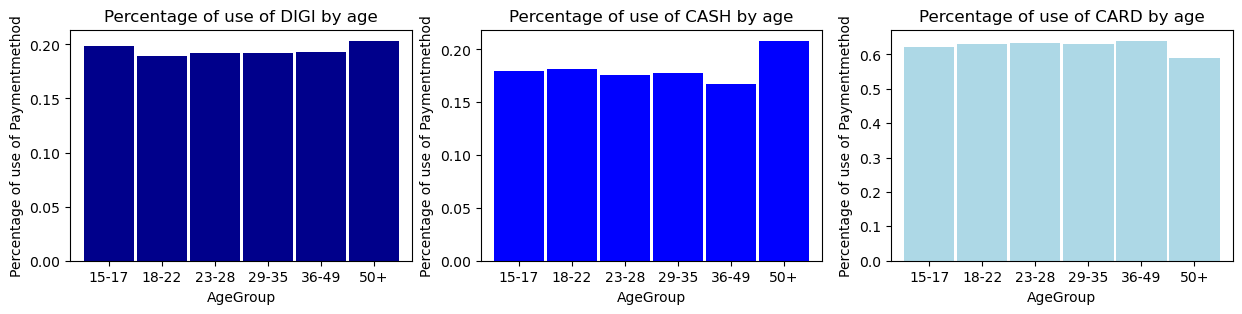

In [7]:
#Plot for Payment method used based on AGE
warnings.filterwarnings('ignore')
Age_CASH = df[df['payment_method'] == 'CASH'].groupby('customer_age_group')['payment_method'].count().div(df.groupby('customer_age_group')['payment_method'].count())
Age_DIGI = df[df['payment_method'] == 'DIGI'].groupby('customer_age_group')['payment_method'].count().div(df.groupby('customer_age_group')['payment_method'].count())
Age_CARD = df[df['payment_method'] == 'CARD'].groupby('customer_age_group')['payment_method'].count().div(df.groupby('customer_age_group')['payment_method'].count())
fig, iplot = plt.subplots(1, 3, figsize=(15, 3))

Age_DIGI.plot(kind='bar', color='darkblue', width=0.95, ax=iplot[0])
iplot[0].set_ylabel('Percentage of use of Paymentmethod')
iplot[0].set_xlabel('AgeGroup')
iplot[0].set_xticks(range(len(Age_CASH.index)))
iplot[0].set_xticklabels(Age_CASH.index, rotation=0)
iplot[0].set_title('Percentage of use of DIGI by age')

Age_CASH.plot(kind='bar', color='blue', width=0.95, ax=iplot[1])
iplot[1].set_ylabel('Percentage of use of Paymentmethod')
iplot[1].set_xlabel('AgeGroup')
iplot[1].set_xticks(range(len(Age_CASH.index)))
iplot[1].set_xticklabels(Age_CASH.index, rotation=0) 
iplot[1].set_title('Percentage of use of CASH by age')

Age_CARD.plot(kind='bar', color='lightblue', width=0.95, ax=iplot[2])
iplot[2].set_ylabel('Percentage of use of Paymentmethod')
iplot[2].set_xlabel('AgeGroup')
iplot[2].set_xticks(range(len(Age_CASH.index)))
iplot[2].set_xticklabels(Age_CASH.index, rotation=0) 
iplot[2].set_title('Percentage of use of CARD by age')

**Conclusions:** 
+ DIGI is balanced, CASH is mostly used by older people above 50, while these use less CARD

#### <span style="color:salmon"> 3.5 Proportions of each last_promo for each payment_method </span>  
To see the last promo in each payment, we did a plot with the three variables:

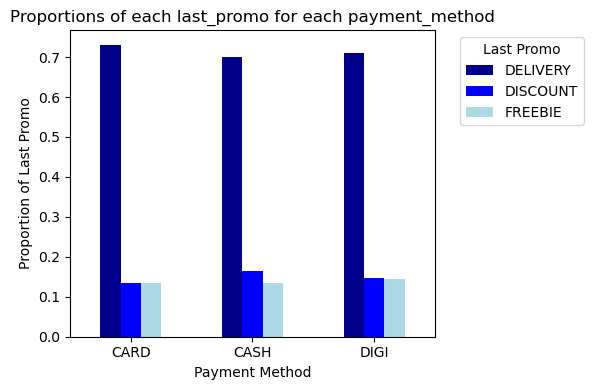

In [8]:
value_counts = df.groupby(['payment_method', 'last_promo']).size().unstack().fillna(0)

# calculating proportions of each last_promo value for each payment_method
normalized_counts = value_counts.div(value_counts.sum(axis=1), axis=0)

colors = {'CARD': 'darkblue', 'CASH': 'blue', 'DIGI': 'lightblue'}
# creating a plot with different colors for each payment_method
normalized_counts.plot(kind='bar', figsize=(6, 4), color=[colors[col] for col in normalized_counts.index]) 

plt.title('Proportions of each last_promo for each payment_method')
plt.xlabel('Payment Method')
plt.ylabel('Proportion of Last Promo')
plt.xticks(rotation=0)
plt.legend(title='Last Promo', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

**Conclusions:** 
+ DELIVERY always has the highest proportion, but for CARD the last_promos is more balanced. 
+ For CASH, the proportion of freebie is lower than usual

#### <span style="color:salmon"> 3.6 Means of each payment_method in vendor_count </span> 
The mean of each payment that have been ordered to unique vendors:

In [9]:
# calculating average value of vendor_count for each payment method
df.groupby(['payment_method'])['vendor_count'].mean()

payment_method
CARD    3.264340
CASH    2.390807
DIGI    2.630617
Name: vendor_count, dtype: float64

**Conclusions** 
+ CASH < DIGI < CARD
+ CARD highest and CASH lowest, maybe because people who try a lot different things and are more open to experimenting new restaurants also are more open to use modern or alternative payment methods
+ Open to use new payment methods like CARD, while more conservative people who still use CASH stay with restaurants they know and like

#### <span style="color:salmon"> 3.7 Means of each payment_method in lifetime_days </span>
Mean of each payment of the diference of last_order and first_order:

In [10]:
# calculating average value of lifetime_days for each payment method
df.groupby(['payment_method'])['lifetime_days'].mean()

payment_method
CARD    39.988232
CASH    23.107922
DIGI    28.176895
Name: lifetime_days, dtype: float64

**Conclusions:** 
+ CASH < DIGI < CARD
+ CARD highest and CASH lowest maybe because who plans to use more frequently registers his CARD on website/app and first time users only use CASH

#### <span style="color:salmon"> 3.8 Means of each payment_method in total_expenses </span>
Mean of each payment of the sum of total expenses:

In [11]:
# calculating average value of total_expenses for each payment method
df.groupby(['payment_method'])['total_expenses'].mean() 

payment_method
CARD    39.204670
CASH    26.414455
DIGI    30.383853
Name: total_expenses, dtype: float64

**Conclusions:** 
+ CASH < DIGI < CARD
+ total_expenses highest with CARD, than DIGI and CASH close. explanation could be that with CASH you have better feeling for how much you spent, with CARD easier
+ To overspend without realizing so much

#### <span style="color:salmon"> 3.9 Means of each payment_method in avg_per_product </span> 
Mean of each payment of the average monetary of all products:

In [12]:
# calculating average value of avg_per_product for each payment method
df.groupby(['payment_method'])['avg_per_product'].mean()

payment_method
CARD    7.369665
CASH    7.522034
DIGI    8.303487
Name: avg_per_product, dtype: float64

**Conclusions:** 
+ CARD < CASH < DIGI
+ The difference between the average per product of CARD, CASH and DIGI is not very big, being DIGI the highest average

#### <span style="color:salmon"> 3.10 Means of each payment_method in avg_per_order </span>  
Mean of each payment of the average monetary per order:

In [13]:
# calculating average value of avg_per_order for each payment method
df.groupby(['payment_method'])['avg_per_order'].mean()

payment_method
CARD     9.910658
CASH     9.921719
DIGI    11.517239
Name: avg_per_order, dtype: float64

**Conclusions:** 
+ CARD < CASH < DIGI
+ The average monetary per order is greater if paying by DIGI

#### <span style="color:salmon"> 3.11 Means of each payment_method in avg_order_size </span> 
Mean of each payment of the average monetary per order size:

In [14]:
# calculating average value of avg_order_size for each payment method
df.groupby(['payment_method'])['avg_order_size'].mean()

payment_method
CARD    1.289182
CASH    1.265480
DIGI    1.325476
Name: avg_order_size, dtype: float64

**Conclusions:** 
+ CASH < CARD < DIGI
+ Who made majors order payed with DIGI, but the differecence is minimal

#### <span style="color:salmon"> 3.12 Means of each payment_method in culinary_variety </span>
Mean of each payment of the porportion of ordered cuisines:

In [15]:
# calculating average value of culinary_variety for each payment method
df.groupby(['payment_method'])['culinary_variety'].mean() 

payment_method
CARD    0.159633
CASH    0.126249
DIGI    0.136978
Name: culinary_variety, dtype: float64

**Conclusions:** 
+ CASH < DIGI < CARD
+ CARD highest, CASH lowest. similar to vendor_count, people with CASH are more conservative people, trying less new method ("new" payment_methods)

#### <span style="color:salmon"> 3.13 Means of each payment_method in chain_preference </span>
Mean of each payment of the porportion of orders from restaurant chains:

In [16]:
# calculating average value of chain_preference for each payment method
df.groupby(['payment_method'])['chain_preference'].mean()

payment_method
CARD    0.620092
CASH    0.655773
DIGI    0.625792
Name: chain_preference, dtype: float64

**Conclusions:** 
+ CARD < DIGI < CASH
+ In chain_preference, the customers prefer paying in CASH, but the difference is minimal

#### <span style="color:salmon"> 3.14 Total expenses per age group </span> 
Mean of the total expenses in each age group:

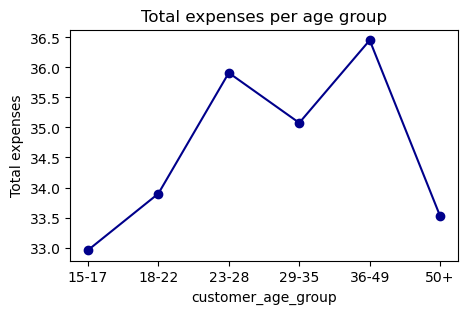

In [17]:
# calculating average value of total_expenses for each customer_age_group
df.groupby(['customer_age_group'])['total_expenses'].mean().plot(marker='o', color='darkblue', figsize=(5,3)) 
plt.ylabel('Total expenses')
plt.title('Total expenses per age group')
plt.show()

**Conclusions:** 
+ Lower at younger age, after 23-28 more regular, probably because young people have less money

#### <span style="color:salmon"> 3.15 Culinary variety per age group </span>
Mean of the culinary variety in each age group:

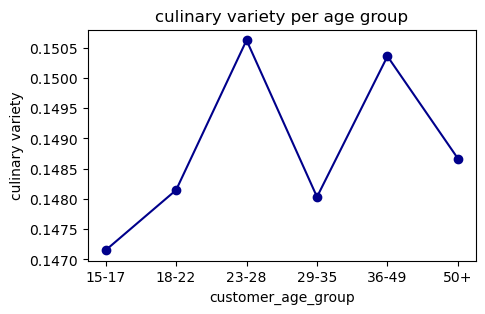

In [18]:
# calculating average value of culinary_variety for each customer_age_group
df.groupby(['customer_age_group'])['culinary_variety'].mean().plot(marker='o', color='darkblue', figsize=(5,3)) 
plt.ylabel('culinary variety')
plt.title('culinary variety per age group')
plt.show()

**Conclusions:** 
+ No big differences but peak at 23-28, maybe because people start to live on their own and try more different things

#### <span style="color:salmon"> 3.16 Means of each last_promo in lifetime_days </span> 
Mean of each last_promo in lifetime_days:

In [19]:
# calculating average value of lifetime_days  for each last_promo
df.groupby(['last_promo'])['lifetime_days'].mean() 

last_promo
DELIVERY    35.438102
DISCOUNT    30.410000
FREEBIE     35.501638
Name: lifetime_days, dtype: float64

**Conclusions:** 
+ DELIVERY < DISCOUNT < FREEBIE
+ FREEBIE highest, DELIVERY lowest

#### <span style="color:salmon"> 3.17 Means of each last_promo in total_expenses </span>
Average value of total_expenses for each last_promo:

In [20]:
df.groupby(['last_promo'])['total_expenses'].mean() 

last_promo
DELIVERY    36.356704
DISCOUNT    29.088489
FREEBIE     35.781481
Name: total_expenses, dtype: float64

**Conclusions:** 
+ DELIVERY < DISCOUNT < FREEBIE
+ FREEBIE highest, DELIVERY lowest but more equal to DISCOUNT. 
+ FREEBIE Discount leads to more expenses in total

#### <span style="color:salmon"> 3.18 Means of each last_promo in avg_per_product </span> 
Average value of avg_per_product for each last_promo:

In [21]:
df.groupby(['last_promo'])['avg_per_product'].mean()

last_promo
DELIVERY    7.606345
DISCOUNT    7.228803
FREEBIE     7.772203
Name: avg_per_product, dtype: float64

**Conclusions:** 
+ DISCOUNT < FREEBIE < DELIVERY
+ In the last_promo, the average_per_product is greater on DELIVERY, but the difference is minimal

#### <span style="color:salmon"> 3.19 Means of each last_promo in avg_per_order </span>  
Average value of avg_per_order for each last_promo:

In [22]:
df.groupby(['last_promo'])['avg_per_order'].mean() 

last_promo
DELIVERY    10.318138
DISCOUNT     9.450173
FREEBIE     10.502922
Name: avg_per_order, dtype: float64

**Conclusions:** 
+ DISCOUNT < FREEBIE < DELIVERY
+ In the last_promo, the average_per_order is greater on DELIVERY, but the difference is minimal

#### <span style="color:salmon"> 3.20 Means of each last_promo in chain_preferences </span>
Average value of chain_preference for each last_promo:

In [23]:
df.groupby(['last_promo'])['chain_preference'].mean() 

last_promo
DELIVERY    0.622433
DISCOUNT    0.652540
FREEBIE     0.628306
Name: chain_preference, dtype: float64

**Conclusions:** 
+ FREEBIE < DELIVERY < DISCOUNT
+ DISCOUNT highest, people with DISCOUNT promo tend to go more to chains

#### <span style="color:salmon"> 3.21 Means of each last_promo in loyalty_to_venders </span>
Average value of loyalty_to_venders for each last_promo:

In [24]:
df.groupby(['last_promo'])['loyalty_to_venders'].mean() 

last_promo
DELIVERY    0.839086
DISCOUNT    0.867429
FREEBIE     0.852646
Name: loyalty_to_venders, dtype: float64

**Conclusions:** 
+ DELIVERY < DISCOUNT < FREEBIE
+ FREEBIE highest, FREEBIE leads to more loyalty

#### <span style="color:salmon"> 3.22 Relations between the costumer age and some types of cuisines </span> 
We do with CUI_Asian, CUI_Desserts and CUI_Healthy per age, because they  are the most  relevant. 

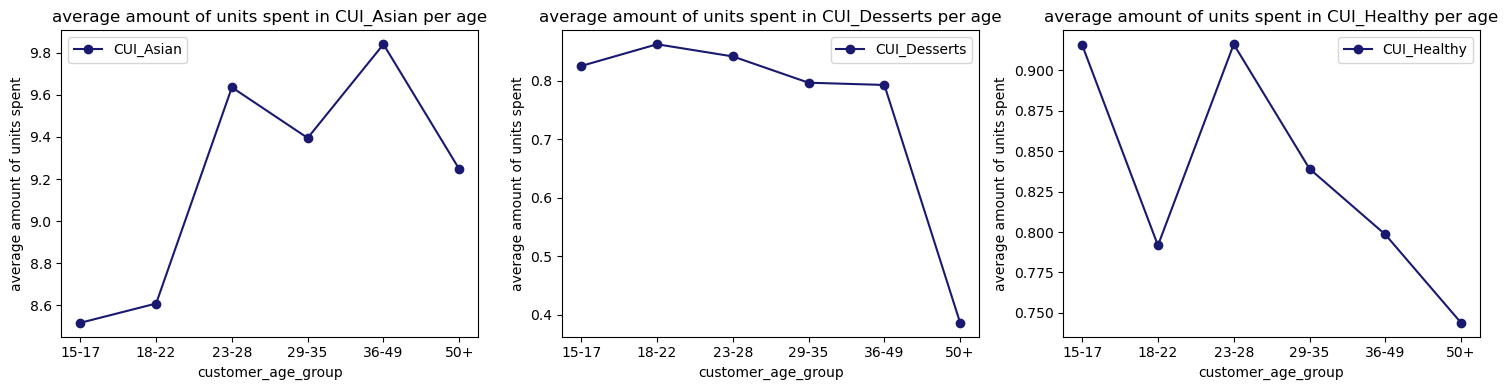

In [25]:
# Plotting the amount of money spent on cuisines based on age
warnings.filterwarnings('ignore')
fig, aplots = plt.subplots(1, 3, figsize=(15, 4))
aplots = aplots.flatten()
CUIcolumns = df[['CUI_Asian', 'CUI_Desserts', 'CUI_Healthy']].columns # choosing only the columns to plot

for i, col in enumerate(CUIcolumns):
    df.groupby('customer_age_group')[col].mean().plot(ax=aplots[i], marker='o', color='midnightblue', label=col)   
    aplots[i].set_title(f'average amount of units spent in {col} per age')
    aplots[i].set_xlabel('customer_age_group')
    aplots[i].set_ylabel('average amount of units spent')
    aplots[i].legend()
    
plt.tight_layout()
plt.show()

**Conclusions:** 
+ *Asian* clear increase by age, maybe because potentially more expensive 
+ *Dessert* clear decrease with age potentially because older people tend to look more on their health
+ *Healthy* peak on 23-28, maybe because at this age more people start to feel more of the effects of unhealthy food, while as children these effects might not necessarily as obvious to the children, so maybe in this age group people especially try to focus more on their health

#### <span style="color:salmon"> 3.23 Means of each total_expenses in chain_preferences </span> 
The values at 'True' stand for the costumer who belong to the highest spenders in order to calculate the mean of each total expenses in chain_preferences:

In [26]:
df.groupby(df['total_expenses'] > 45)['chain_preference'].mean()

total_expenses
False    0.651413
True     0.550471
Name: chain_preference, dtype: float64

**Conclusions:** 
+ Big spenders tend to go to less different chains

#### <span style="color:salmon"> 3.24 Proportions of each last_promo value for the two groups of people </span> 
Proportions of each last_promo value for the two groups of people:

In [27]:
df.groupby(df['total_expenses'] > 45)['last_promo'].value_counts(normalize=True)

total_expenses  last_promo
False           DELIVERY      0.708103
                DISCOUNT      0.154524
                FREEBIE       0.137373
True            DELIVERY      0.762861
                FREEBIE       0.137641
                DISCOUNT      0.099498
Name: proportion, dtype: float64

**Conclusions:** 
+ Big spenders use FREEBIE a lot more, while low spenders use DELIVERY the most

#### <span style="color:salmon"> 3.25 Cuisines and total_expenses  </span>
We also check for the cuisines, in which cuisines the big spending costumer have a higher increase than in other, to see where the big spenders spent the most in comparisation to the 'normal' spenders:

In [28]:
percent_differences = {}

cuisine = df.filter(like='CUI_').columns.tolist() # Types of cuisine

for column in cuisine:
    mean_above_45 = df[df['total_expenses'] > 45][column].mean()
    mean_below_45 = df[df['total_expenses'] <= 45][column].mean()
    
    percent_difference = ((mean_above_45 - mean_below_45) / mean_below_45) * 100
    percent_differences[column] = percent_difference
    
pd.DataFrame(list(percent_differences.items()), columns=['Column', 'Percent Difference']).sort_values(by='Percent Difference', ascending=False)

,Column,Percent Difference
13,CUI_Street Food / Snacks,735.213767
3,CUI_Cafe,557.249689
1,CUI_Asian,502.341450
7,CUI_Healthy,322.918700
6,CUI_Desserts,318.019905
10,CUI_Japanese,312.161806
0,CUI_American,262.452061
5,CUI_Chinese,255.928690
12,CUI_OTHER,232.837857
9,CUI_Italian,228.448942


**Conclusions:** 
+ The biggest spenders have their highest increase of spending compared to the other costumers in StreetFood/Snacks, Cafe, Asian, Healthy and Desserts, while the lowest increase is in Chicken Dishes, Noodles Dishes and Indian

#### <span style="color:salmon"> 3.26 Cuisines and loyalty_to_venders  </span> 
A higher loyality value significates that a costumer tends to place more orders at single vendors rather than using a lot of vendors. <br>

So the ones with loaylty value of higher than 7 will be considered as the most loyal costumers in this step.

In [29]:
percent_differences2 = {}

for column in cuisine:
    mean_above_7 = df[df['loyalty_to_venders'] < 0.15][column].mean()
    mean_below_7 = df[df['loyalty_to_venders'] >= 0.15][column].mean()
    
    percent_difference2 = ((mean_above_7 - mean_below_7) / mean_below_7) * 100
    percent_differences2[column] = percent_difference2
    
pd.DataFrame(list(percent_differences2.items()), columns=['Column', 'Percent Difference']).sort_values(by='Percent Difference', ascending=False)

,Column,Percent Difference
9,CUI_Italian,673.141562
0,CUI_American,122.084361
11,CUI_Noodle Dishes,110.966690
7,CUI_Healthy,96.093445
10,CUI_Japanese,85.623598
2,CUI_Beverages,31.192671
5,CUI_Chinese,9.292836
1,CUI_Asian,-19.554216
4,CUI_Chicken Dishes,-21.170926
8,CUI_Indian,-32.920592


**Conclusions:**  
+ The most loyal costumers to restaurants are Italian Cuisine, followed by Chinese and Cafe. The lowest are Desserts and Snacks where Costumers tend to choose any place without too much thought.

#### <span style="color:salmon"> 3.27 Customer_regions  </span>
Total_expensees per customer_region:

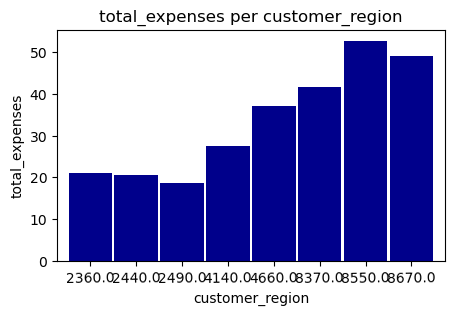

In [30]:
df.groupby(['customer_region'])['total_expenses'].mean().plot(color='darkblue', figsize=(5,3), kind='bar', width=0.95) 
plt.ylabel('total_expenses')
plt.xticks(rotation=1)
plt.title('total_expenses per customer_region')
plt.show()

**Conclusions:** 
+ The region 8550 spends more than the others

<a class="anchor" id="four-bullet"> 

## <span style="color:salmon"> 4. Export Datasets</span> 

<a href="#top">Top &#129033;</a>

In [31]:
# Store in df_visualizations the DataFrame of our dataset df
df_visualizations = pd.DataFrame(df)

# Save to CSV
df_visualizations.to_csv('../dataset/df_visualizations.csv', index=False)